<h1>Cluster boundaries</h1>
<p>This notebook first shows code from an sklearn tutorial and then adapts it to demonstrate effects of different distributions of 2D Euclidean data on similarities.</p>

In [7]:
import numpy as np
from sklearn.datasets import load_digits
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<h1>Create data with three clusters with different distributions</h1>

In [13]:
from numpy.random import multivariate_normal as mvnl

In [59]:
mean1 = [-2, -2]
cov1 = [[0.05, 0], [0, 0.05]]
mean2 = [2, 1]
cov2 = [[0.05, 0], [0, 0.05]]
mean3 = [-1, 2]
cov3 = [[0.5, 0], [0, 0.25]]
x1, y1 = mvnl(mean1, cov1, 50).T
x2, y2 = mvnl(mean2, cov2, 50).T
x3, y3 = mvnl(mean3, cov3, 50).T

In [60]:
x = np.array([x1, x2, x3]).flatten()
y = np.array([y1, y2, y3]).flatten()

In [66]:
data = np.array([[a,b] for a,b in zip(x, y)])

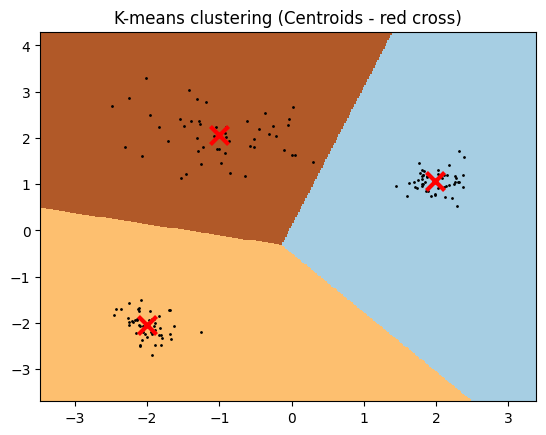

In [67]:
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
kmeans.fit(data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(data[:, 0], data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="r",
    zorder=10,
)
plt.title(
    "K-means clustering (Centroids - red cross)"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

<h1>Random data points</h1>
<p>Our three clusters partition the entire 2D space, but we if we treat the clusters as the original 2D 
Normal distributions, not all potential datapoints are equally likely.</p>